In [235]:
import numpy as np
import pandas as pd

In [236]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [237]:
df_gdp=pd.read_excel("http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel",skiprows=range(3))
#df_gdp.head()

In [238]:
df_gdp.shape

(264, 64)

In [239]:
df_gdp = df_gdp.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df_gdp = df_gdp.drop('2019', axis=1)
#df_gdp.head()

In [240]:
df_gdp.rename(columns={'Country Name':'Country'}, inplace=True)
#df_gdp.head()

In [241]:
df_gdp.set_index(['Country'], inplace=True)
#df_gdp.head()

In [242]:
df_gdp.drop(df_gdp.loc[:,'1960':'1979'].columns,axis=1, inplace=True)
#df_gdp.head()

In [243]:
df_gdp.drop(['Arab World','Central Europe and the Baltics','East Asia & Pacific (excluding high income)',
             'Early-demographic dividend','East Asia & Pacific','Europe & Central Asia (excluding high income)',
             'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
             'Heavily indebted poor countries (HIPC)','IBRD only','IDA & IBRD total','IDA total','IDA blend','IDA only',
             'Latin America & Caribbean (excluding high income)','Lao PDR','Latin America & Caribbean',
             'Least developed countries: UN classification','Low income','Lower middle income','Low & middle income',
             'Late-demographic dividend','Middle East & North Africa','Middle income','Middle East & North Africa (excluding high income)',
             'OECD members','Other small states','Pre-demographic dividend','West Bank and Gaza','Pacific island small states',
             'Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)','Small states',
             'Turks and Caicos Islands','East Asia & Pacific (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)',
             'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa (IDA & IBRD countries)',
             'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World','North America','Sub-Saharan Africa'], 
            axis=0, inplace=True)
#df_gdp.head()

In [244]:
all(isinstance(column, str) for column in df_gdp.columns)

True

In [245]:
df_gdp.columns = list(map(str, df_gdp.columns))
all(isinstance(column, str) for column in df_gdp.columns)

True

In [246]:
print ('data dimensions:', df_gdp.shape)

data dimensions: (216, 39)


In [247]:
df_gdp.columns=list(map(str,df_gdp.columns))
years=list(map(str,range(1980,2019)))
#years

In [248]:
df_gdp['Total'] = df_gdp.sum(axis=1)

In [249]:
df_gdp = df_gdp.fillna(0)

In [250]:
df_gdp = df_gdp.sort_values(by='2018', ascending=False, axis=0)

In [251]:
#df_gdp.sort_values(['Total'], ascending=False)

df_gdp_top15 = df_gdp['2018'].head(15)
#df_gdp_top15

In [252]:
df_gdp_top15 = df_gdp[years].head(15)
#df_gdp_top15

In [253]:
years_80s=list(map(str,range(1980,1990)))
years_90s=list(map(str,range(1990,2000)))
years_00s=list(map(str,range(2000,2010)))
years_10s=list(map(str,range(2010,2018)))

In [254]:
df_80s=df_gdp_top15.loc[:,years_80s].mean(axis=1)
df_90s=df_gdp_top15.loc[:,years_90s].mean(axis=1)
df_00s=df_gdp_top15.loc[:,years_00s].mean(axis=1)
df_10s=df_gdp_top15.loc[:,years_10s].mean(axis=1)

new_df_gdp = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s,'2010s':df_10s}) 
#new_df_gdp.head()

In [255]:
new_df_gdp.describe()

,1980s,1990s,2000s,2010s
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
mean,7.296921e+11,1.504947e+12,2.393222e+12,3.737991e+12
std,1.051871e+12,1.974921e+12,3.024871e+12,4.299314e+12
min,1.061214e+11,3.535083e+11,6.541588e+11,1.179324e+12
25%,2.170417e+11,4.366282e+11,8.483836e+11,1.538744e+12
50%,2.733753e+11,6.427365e+11,1.102224e+12,2.060247e+12
75%,6.769944e+11,1.378911e+12,2.458038e+12,3.171702e+12
max,4.173163e+12,7.577130e+12,1.259074e+13,1.718126e+13


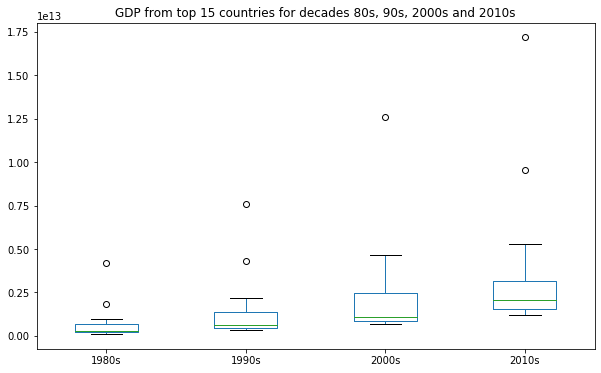

In [256]:
new_df_gdp.plot(kind='box', figsize=(10,6))
plt.title('GDP from top 15 countries for decades 80s, 90s, 2000s and 2010s')
plt.show()

In [257]:
new_df_gdp.head(15)

,1980s,1990s,2000s,2010s
Country,,,,
United States,4.173163e+12,7.577130e+12,1.259074e+13,1.718126e+13
China,2.626079e+11,6.863142e+11,2.592138e+12,9.559601e+12
Japan,1.815785e+12,4.327938e+12,4.663733e+12,5.280374e+12
Germany,9.900306e+11,2.177681e+12,2.764824e+12,3.596108e+12
United Kingdom,6.244775e+11,1.326610e+12,2.323938e+12,2.747296e+12
France,7.295113e+11,1.431213e+12,2.096976e+12,2.668358e+12
India,2.364114e+11,3.535083e+11,8.303781e+11,2.033552e+12
Italy,5.934750e+11,1.216282e+12,1.756476e+12,2.060247e+12
Brazil,2.733753e+11,6.427365e+11,9.709591e+11,2.233893e+12


In [386]:
#'Scatter plots'

In [387]:
df_gdp_tal = pd.DataFrame(df_gdp[years].sum(axis=0))

df_gdp_tal.index = map(int, df_gdp_tal.index)

df_gdp_tal.reset_index(inplace = True)

df_gdp_tal.columns = ['year', 'total']

df_gdp_tal.head()

,year,total
0,1980,1.069390e+13
1,1981,1.107674e+13
2,1982,1.097108e+13
3,1983,1.118908e+13
4,1984,1.159689e+13


Text(0, 0.5, 'GDP(current US$)')

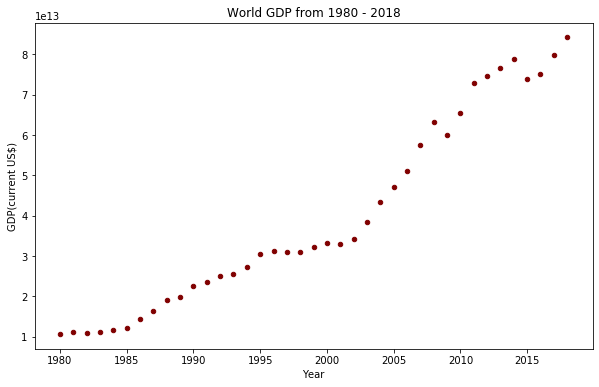

In [388]:
df_gdp_tal.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='#800000')

plt.title('World GDP from 1980 - 2018')
plt.xlabel('Year')
plt.ylabel('GDP(current US$)')

In [389]:
df_gdp_top3 = df_gdp.loc[['United States','Japan','China'], years].transpose()
#df_gdp_top3.head()

In [390]:
df_gdp_tal2 = pd.DataFrame(df_gdp_top3.sum(axis=1))
df_gdp_tal2.reset_index(inplace=True)

df_gdp_tal2.columns = ['year', 'total']
df_gdp_tal2['year'] = df_gdp_tal2['year'].astype(int)

#df_gdp_tal2.head()

In [391]:
df_gdp_mi3 = df_gdp.loc[['India','Italy','Brazil'], years].transpose()
#df_gdp_mi3.head()

In [392]:
df_gdp_tal3 = pd.DataFrame(df_gdp_mi3.sum(axis=1))
df_gdp_tal3 = df_gdp_tal3.reset_index()

df_gdp_tal3.columns = ['year', 'total']
df_gdp_tal3['year'] = df_gdp_tal3['year'].astype(int)

#df_gdp_tal3.head()

In [393]:
df_gdp_least3 = df_gdp.loc[['Australia','Spain','Mexico'], years].transpose()
#df_gdp_least3.head()

In [394]:
df_gdp_tal4 = pd.DataFrame(df_gdp_least3.sum(axis=1))
df_gdp_tal4 = df_gdp_tal4.reset_index()

df_gdp_tal4.columns = ['year', 'total']
df_gdp_tal4['year'] = df_gdp_tal4['year'].astype(int)

#df_gdp_tal4.head()

In [395]:
'''fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)




df_gdp_tal.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#800000', ax=ax0)
ax0.set_title('Total GDP from 1980 - 2018')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP(current US$)')

df_gdp_tal2.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#00CED1', ax=ax1)
ax1.set_title ('GDP from United States, Japan and China from 1980-2018')
ax1.set_ylabel('GDP(current US$)')
ax1.set_xlabel('Year')

df_gdp_tal3.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='pink', ax=ax2)
ax2.set_title ('GDP from India, Italy and Brazil from 1980-2018')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP(current US$)')

df_gdp_tal4.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#90EE90', ax=ax3)
ax3.set_title ('GDP from Australia, Spain and Mexico from 1980-2018')
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP(current US$)')

plt.show()'''

"fig = plt.figure()\n\nax0 = fig.add_subplot(2, 2, 1)\nax1 = fig.add_subplot(2, 2, 2)\nax2 = fig.add_subplot(2, 2, 3)\nax3 = fig.add_subplot(2, 2, 4)\n\n\n\n\ndf_gdp_tal.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#800000', ax=ax0)\nax0.set_title('Total GDP from 1980 - 2018')\nax0.set_xlabel('Year')\nax0.set_ylabel('GDP(current US$)')\n\ndf_gdp_tal2.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#00CED1', ax=ax1)\nax1.set_title ('GDP from United States, Japan and China from 1980-2018')\nax1.set_ylabel('GDP(current US$)')\nax1.set_xlabel('Year')\n\ndf_gdp_tal3.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='pink', ax=ax2)\nax2.set_title ('GDP from India, Italy and Brazil from 1980-2018')\nax2.set_xlabel('Year')\nax2.set_ylabel('GDP(current US$)')\n\ndf_gdp_tal4.plot(kind='scatter', x='year', y='total', figsize=(20, 15), color='#90EE90', ax=ax3)\nax3.set_title ('GDP from Australia, Spain and Mexico from 1980-2018')\nax3.set_xl

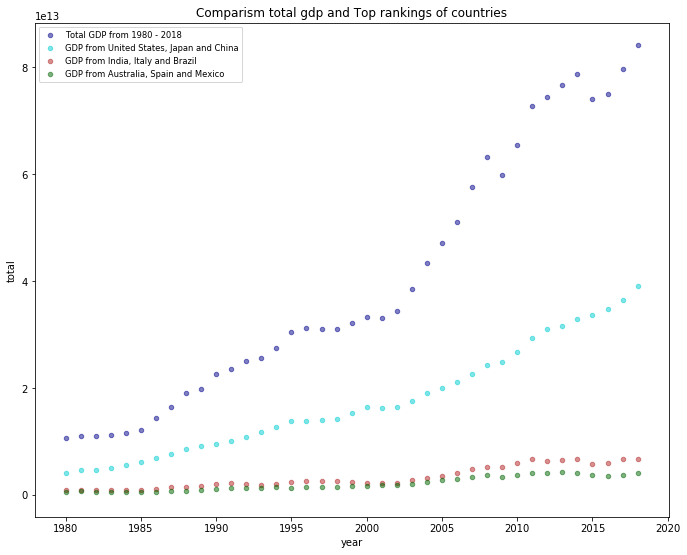

In [406]:
import pylab as plt

'''x = np.random.randint(low=1,high=5,size=50)
y = np.random.randint(low=0,high=2,size=50)
jittered_y = y + 0.1 * np.random.rand(len(y)) -0.08
jittered_x = x + 0.1 * np.random.rand(len(x)) -0.08'''

fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
'''ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 2)'''

df_gdp_tal.plot(kind='scatter', x='year', y='total', figsize=(25, 20), color='darkblue',alpha=0.5, ax=ax0, label='Total GDP from 1980 - 2018')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP(current US$)')

df_gdp_tal2.plot(kind='scatter', x='year', y='total', figsize=(25, 20), color='#00CED1',alpha=0.5, ax=ax0, label='GDP from United States, Japan and China')

df_gdp_tal3.plot(kind='scatter', x='year', y='total', figsize=(25, 20), color='firebrick',alpha=0.5,ax=ax0, label='GDP from India, Italy and Brazil')

df_gdp_tal4.plot(kind='scatter', x='year', y='total', figsize=(25, 20), color='darkgreen',alpha=0.5, ax=ax0, label='GDP from Australia, Spain and Mexico')
ax0.set_title ('Comparism total gdp and Top rankings of countries')

plt.legend(loc='upper left');

plt.show()